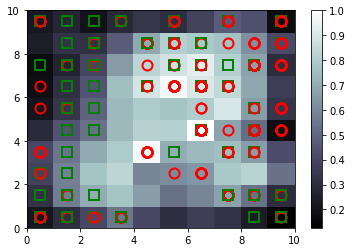

In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom


som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# Visualize the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) 
colorbar() # add the legend
markers = ['o','s'] # marker type
colors = ['r', 'g'] # color the markers

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
         )
show()

In [3]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,6)], mappings[(6,4)], mappings[(4,3)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [6]:
# Going from unsupervised to supervised learning

# Create the matrix of features
customers = dataset.iloc[:,1:].values 

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))

# Check if customer ID is in the fraud list
for i in range(0, len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(customers)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, nb_epoch = 50)

/home/devinlax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=2, kernel_initializer="uniform")`
/home/devinlax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/home/devinlax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
Epoch 1/50
690/690 [==============================] - 2s 2ms/step - loss: 0.3557 - accuracy: 0.9174
Epoch 2/50
690/690 [==============================] - 2s 3ms/step - loss: 0.2951 - accuracy: 0.9174
Epoch 3/50
690/690 [==============================] - 2s 3ms/step - loss: 0.2804 - accuracy: 0.9174
Epoch 4/50
690/690 [==============================] - 1s 2ms/step - loss: 0.2690 - accuracy: 0.9174
Epoch 5/50
690/690 [==============

In [15]:

# Part 3 - Making the predictions and evaluating the model

# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis=1)# match up customer IDs with fraud probabilities
y_pred = y_pred[y_pred[:,1].argsort()]